# Notes on Similarity Metrics

The last notebook on this month in the domain of collaborative filtering (CF) is to take a look at the metrics that were used in the 2 previous notebooks about [User User CF](https://github.com/caiomiyashiro/RecommenderSystemsNotebooks/blob/master/Month%202%20Part%20I%20-%20User%20User%20Collaborative%20Filtering.ipynb) and [Item Item (CF)](https://github.com/caiomiyashiro/RecommenderSystemsNotebooks/blob/master/Month%202%20Part%20II%20-%20Item%20Item%20Collaborative%20Filtering.ipynb) and analyse their properties, such as how to interpret/visualise them, when they are good or bad and if we should make any assumptions when using them.

## Metrics

The main metrics used are:

* Euclidean Distance
* Pearson Correlation
* Cosine Similarity

# Euclidean Distance

In the context of CF, the most famous used distance maps the User x Item matrix into the euclidean space and creates a vector in $\mathbb{R}^{n}$, where $n$ is the amount of items of interest. For example, in a User User CF, each user is a vector and each dimension of de vector is an item that he's recommended. If we're talking about Item Item CF, each item is a vector, and each rating it's received from an user is a dimension. The euclidean distance between two points is just the length of the straight line from the edge of vector 1 to the edge of vector 2.

<img src="images/notebook6_image1.png" width="300">

The formula is basically extracted from [Pythagorean Formula](https://en.wikipedia.org/wiki/Pythagorean_theorem), where each of the vertices now have a total lenth of ($P_{1} - P_{2}$)

$$d(p,q) = d(p,q) = \sqrt{(q_{1} - p_{1})^{2} + (q_{2} - p_{2})^{2} + ... + (q_{n} - p_{n})^{2}} =  \sqrt{\sum_{i=1}^{n}(p_{i} - q_{i})^{2}}$$

The euclidean distance **is scale dependent**, *i.e.*, it considers the direction **and** the magnitude of the vector, which is not the case for the cosine similarity, for example. There are cases where we want to consider the magnitude as well, such as in cluster operations. It doens't matter for the cluster algorithm if two points (vectors) are pointing to the same direction, but it matters if their 'physical' distance (euclidean) is small.
  
On other cases, this physical distance might not be desired, as we only want to check if two arrays are pointing to the same direction. This case is highlighted here in recommender systems. In this domain, we are interested in how two vectors vary together in a linear fashion, and not their total distance. In graphical terms, we want these two vectors to have the same similarity, even though they have different magnitudes. We're still going to take a look at the cosine similarity, but for now it is enough to say that the closest to 1 the better.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

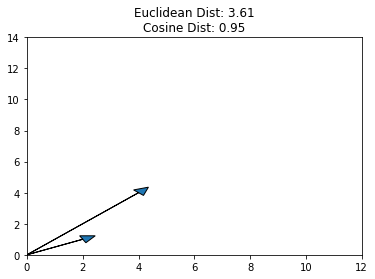

In [2]:
arrayA = np.array([2,1]); arrayB = np.array([4,4]);

plt.arrow(x = 0, y = 0, dx = arrayA[0], dy = arrayA[1], head_width=0.5, head_length=0.5)
plt.arrow(x = 0, y = 0, dx = arrayB[0], dy = arrayB[1], head_width=0.5, head_length=0.5)
plt.xlim(0,12); plt.ylim(0,14);

euclideanDistance = np.sqrt(np.sum((arrayA - arrayB)**2))
cosineSim = np.dot(arrayA, arrayB)/(np.linalg.norm(arrayA) * np.linalg.norm(arrayB))

plt.title('Euclidean Dist: ' + str(round(euclideanDistance,2)) + '\n' +
         'Cosine Dist: ' + str(round(cosineSim,2)));

## Euclidean Space in High Dimensions

As a distance metric, the euclidean distance also has some disadvantages in high dimensions. Suppose you have a database of 1000 clients and a movie catalog of 100.000 movies and lets make the world a little better and say that surprisingly all users rated all the movies (loyal clients). This is often the scenario in other sciences, such as microarray analysis, where we usually have a few samples with thousands of dimensions. Data in high dimensions can become really sparse. In fact, depending on the dimensionality of your problem, the points become so sparse/ away from each other that the distance between them becomes the same high distance to each other point. This is called the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) and it makes you wonder, depending on the application, that there might be a limit where you should use the euclidean distance, even if it makes sense for the application and if it works for a sample dataset, as it can bring you almost random clusters.

Just to show a practical usage of the problem, supose we have a database composed of 5000 clients. We are going to see how much the ration between the minimum distance and maximum distance between the points vary by increasing the number of variables for each user. A great, more complete analysis of the performance of metrics in high dimensional settings can be found [here](https://bib.dbvis.de/uploadedFiles/155.pdf).

In [3]:
%%time
nbrVariables = 5000
nbrDimensions = np.arange(1000,50000,1000)
mu, sigma = 500, 500

distanceRatios = []
for nbrDimension in nbrDimensions:
    variables = np.random.normal(mu, sigma, [nbrVariables,nbrDimension])
    distances = pd.DataFrame(euclidean_distances(variables))
    minValue = min(distances.apply(lambda col : min(col[col != 0])))
    maxValue = max(distances.apply(lambda col : max(col[col != 0])))
    distanceRatios.append(minValue/maxValue)


CPU times: user 39min 53s, sys: 38.2 s, total: 40min 31s
Wall time: 13min 9s


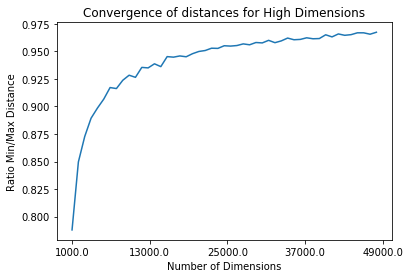

In [4]:
plt.plot(distanceRatios)
plt.xlabel('Number of Dimensions')
plt.ylabel('Ratio Min/Max Distance')

nbrPoints = 5
plt.xticks(np.linspace(0, len(distanceRatios), nbrPoints),
           np.round(np.linspace(min(nbrDimensions), max(nbrDimensions), nbrPoints)))
plt.title('Convergence of distances for High Dimensions');

As we see, it is very interesting to see how the ration goes to 1, *i.e.*, minimum values = maximum value as the number of dimensions increase for the users.


# Pearson Correlation

The pearson correlation coefficient comes from the covariance factor between two variables and normalised to have a bounded value between 0 and 1. It answers the following question: **How much linear correlated** the variables $x$ and $y$ are? As the values are normalised, its possible to have some guidelines for the coefficient value, such as:

* Exactly 1. A perfect uphill (positive) linear relationship
* 0.70. A strong uphill (positive) linear relationship
* 0.50. A moderate uphill (positive) linear relationship
* 0.30. A weak uphill (positive) linear relationship
* 0 no **linear** relationship, neither positive nor negative
* The same for negative values

The value comes from dividing the covariance between variables $x$ and $y$ and dividing it by the product of $x$ and $y$ standard deviations:

$$r_{x,y} = \frac{S_{xy}}{S_{x}S_{y}}\hspace{7.0cm}$$

$$= \frac{\frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n-1}}{\frac{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}}{n-1}  \frac{\sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y}})^{2}}{n-1}}\hspace{4.5cm}(1)$$

$$= \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}  {\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} \sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}\hspace{3cm}(2)$$

Lets take a look first at equation (1):

- Nominator: It basically extracts the following info:
    - For a covariance value of $c$. In average, a dislocation in 1 unit from the mean value in $x$ represent a dislocation in $c^{2}$ units in $y$.
    - Differently from the 1 variable standard deviation = square root of the variance, we don't take square roots from the covariance values, as it is still not easily understandable. For example, the covariance output would be in the unit $x^{2}y^{2}$ and taking the square root would still be on the unit $xy$. Instead of finding a a proper valid unit transformation, people tend to go directly to a unitless variable, the correlation.
      
      
- Denominator: Normalisation factor to transform the output between -1 and 1
  
## Pearson Correlation Assumptions

As you've seen at the formula, we are using the arithmetic mean to define how much a point deviates from the data's mass centre. The problem of using the arithmetic mean is that it isn't a [robust statistic](https://en.wikipedia.org/wiki/Robust_statistics), *i.e.*, it might not well represent the data if data is to far from normal distribution or in the presence of outliers. As it so, we find these two first assumptions for using pearson's correlation:
* Approximately normaly distributed
* Best performance if without outliers

In the context of recommender system, we expect that each dimension of the ratings data to be close to normally distributed, *i.e.*, each movie has received ratings data in a close to normal distribution. Of course normality assumptions can be really malleable when deciding whether our data fits normality or not, but it is always good to keep it in mind. 
  
For outliers, this problem wouldn't be present in our ratings data, as it has a lower and upper bound for ratings, but it's always good to know how the arithmetic mean can be subjected to outliers in the data and bring wrong informations to your investigations.

Secondly, as we're using the covariance information in the formula's nominator, we have to have a constant variance in our two variables, as [heteroscedasticity](http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html) would bring not trusted information in the covariance calculation. Soo:
* Constant variance

Finally, pearson correlation search for **linear** correlations. That means that if pearson = 0, it doesn't mean there is no relationship in your data, it means there is no linear relationship. 
On another perspective, variables can show all sorts of non-linear relationships, but pearson won't return a 0 for most of these times, as it will capture (maybe) wrong signals of data linearity. A good example on this is the [Ascombe Quartets](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) where he created four sets of data with the same mean (7.5), variance (4.12), correlation (0.816) and regression line (y = 3 + 0.5x), but are clearly different:

<img src="images/notebook6_image2.png" width="500">

So last assumption/rule is: 

* Always look at your data.

<img src="images/notebook6_image3.png" width="400">
  
## Disadvantage  

Person correlation is the main metric used in a User User CF context, which we use to calculate the similarity between users in the nearest neighboors algorithm. The problem is that pearson correlation doesn't take into account the number of points used in the correlation calculation. This brings a problem that it users that co-rated only a few items can have the same or better correlation than users with lots of co-rated items. In fact ([Herlocker et all, 2002](https://grouplens.org/site-content/uploads/evaluating-TOIS-20041.pdf)) already proved that indeed the  performance of these types of RS performs worse when matching users with small amount of co-rated items. Herlocker himself proposed an alternative for this problem, which he named as *Significance Weighting*. This metric works similarly to a damped mean, where we want to take 'confident averages', *i.e.* average of values where the amount of items being considered is at least a constant $k$. Is his experiments, Herlockers used $k=50$ and showed significant improvements in the RS performance accuracy. One last thought is that sometimes people don't have big systems where users co-ratings can get as high as 50 and can make people forced to investigate whether this significance weighting is proper for them in their context.

# Cosine Similarity

As introduced at the beggining, the cosine similarity is not scale dependent and is used as a similarity measures between two vectors in the vector space. It comes from the definition of the dot product and is defined by the following formula:

$$a.b = ||a||*||b|| * cos\theta  \rightarrow  cos\theta =  \frac{a.b}{||a||*||b||}$$
  
I like to think the cosine similarity as the dot product between normalised vectors, as the denominator $||a|| * ||b||$ is used to normalise the arrays for the dot product to have $norm = 1$. [By definition](https://en.wikipedia.org/wiki/Unit_vector), the dot product of unit vectors are in fact the cosine of the angle between the two vectors. We can take a look at both formulas (traditional formula and dot product between normalised vectors)



In [5]:
arrayA = np.array([2,1]); arrayB = np.array([4,4]);
arrayA_norm = arrayA/np.linalg.norm(arrayA); arrayB_norm = arrayB/np.linalg.norm(arrayB)

print('Cosine Similarity Original Formula: ' + 
      str(round(np.dot(arrayA, arrayB)/(np.linalg.norm(arrayA) * np.linalg.norm(arrayB)),5)))
print('Cosine Similarity Dot Product Between Normalised Vectors: ' + str(round(np.dot(arrayA_norm, arrayB_norm),5)))

Cosine Similarity Original Formula: 0.94868
Cosine Similarity Dot Product Between Normalised Vectors: 0.94868


As a cosine measure, its maximum values (1) are going to happen when the angle between the two vectors is only 0 degrees or $0$ radians (exactly the same).

## Advantages and Disadvantages

As stated when compared to Euclidean Distance, Cosine Similarity is robust against vectors magnitudes. **However**, this isn't a golden rule, as sometimes we want to consider the vector magnitudes as similarity features. See an example [here](https://stats.stackexchange.com/questions/266979/drawbacks-with-cosine-similarity).

Another thing that cosine similarity [fails to take into account is the scale variability between ratings](http://files.grouplens.org/papers/www10_sarwar.pdf), as we can see we're multipying the absolute values of the vectors elements. A remedy to this is to change the denominator of the cosine formula by subtracting each element by its mean value and we're going to take a look at it at the next section.

## Mean Centered Cosine Similarity and Pearson Correlation

Lets consider the context of Item Item CF. We can adapt the cosine similarity formula by removing each user's rating given to the item by the average rate value from that user. Lets expand the dot product by a summation and take a look at the formula after we subtract each term by the user mean:

$$sim(i,j)  = \frac{\sum_{u\in U}(R_{u,i} - \bar{R_{i}})  (R_{u,j} - \bar{R_{i}})}{\sqrt{\sum_{u\in U}(R_{u,i} - \bar{R_{i}})^{2}}\sqrt{\sum_{u\in U}(R_{u,j} - \bar{R_{i}})^{2}}}$$

Wait, isn't this similar to the pearson correlation we've seen before? Lets remeber it:

$$r_{x,y} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}  {\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} \sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}$$

When dealing with mean centered vectors, we can interpret the cosine similarity as the pearson correlation of the two vectors - [Demonstration](https://stats.stackexchange.com/questions/235673/is-there-any-relationship-among-cosine-similarity-pearson-correlation-and-z-sc). However, there are some subtle differences between them and Michael Ekstrand [explain them](https://md.ekstrandom.net/blog/2015/06/item-similarity) very well. When we're calculating the pearson correlation in the User User CF, we don't consider items that some user didn't rate. This item would disappear from the nominator **and** denominator. In the adjusted cosine similarity, in the context of Item Item CF, we don't have one user in focus, but one item. That means we can make a different coverage with the denominator, considering a value of 0 if user $u$ didn't rate the item **and** considering them in the denominator. This little difference creates a fancy natural damper for items that had fewer rates, which is exactly one of the functionalities we want when calculating similarities.

